In [4]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

rnd_graph_number_for_G1 = 100
rnd_graph_number_for_G2 = 100

In [5]:
colony_1_1 = "data/colony1/insecta-ant-colony1-day01.edges"
colony_1_10 = "data/colony1/insecta-ant-colony1-day10.edges"
colony_1_25 = "data/colony1/insecta-ant-colony1-day25.edges"
colony_1_41 = "data/colony1/insecta-ant-colony1-day41.edges"

G1_1 = nx.read_weighted_edgelist(colony_1_1, nodetype = int)
G1_10 = nx.read_weighted_edgelist(colony_1_10, nodetype = int)
G1_25 = nx.read_weighted_edgelist(colony_1_25, nodetype = int)
G1_41 = nx.read_weighted_edgelist(colony_1_41, nodetype = int)

colony_2_1 = "data/colony2/insecta-ant-colony2-day01.edges"
colony_2_10 = "data/colony2/insecta-ant-colony2-day10.edges"
colony_2_25 = "data/colony2/insecta-ant-colony2-day25.edges"
colony_2_41 = "data/colony2/insecta-ant-colony2-day41.edges"

G2_1 = nx.read_weighted_edgelist(colony_2_1, nodetype = int)
G2_10 = nx.read_weighted_edgelist(colony_2_10, nodetype = int)
G2_25 = nx.read_weighted_edgelist(colony_2_25, nodetype = int)
G2_41 = nx.read_weighted_edgelist(colony_2_41, nodetype = int)

<img src="banner.png" />

# I- Graph datasets G1 and G2 description.

Dataset is used that two separate colonies of the ant. The owner of this dataset recorded the position and orientation of all individuals twice per second to reconstruct spatial movement and infer all social interactions occurring over the 41 days of the experiment. However, we used just the 41th, the dataset of these two colonies.


#### GRAPH DATASET (G1)
G1 is one type of and the colony of the 41th, days measurement.The graph specification is shown in the table.
<table>
<thead>
<tr>
<th>Graph_Id</th>
<th>Nodes</th>
<th>Edges</th>
<th>Density</th>    
</tr>
</thead>
<tbody>
<tr>
<td>G_1</td>
<td>55</td>
<td>1.1K</td>
<td>0.760269</td>
    
</tr>


</tbody>
</table>

#### GRAPH DATASET (G2)
G2 is second type of and the colony of the 41th, days measurement.The graph specification is shown in the table.
<table>
<thead>
<tr>
<th>Graph_Id</th>
<th>Nodes</th>
<th>Edges</th>
<th>Density</th>    
</tr>
</thead>
<tbody>
<tr>
<td>G_2</td>
<td>58</td>
<td>930</td>
<td>0.562613</td>
    
</tr>


</tbody>
</table>

In [6]:
###---Reading Dataset---###

G1_node_size = len(G1_41.nodes)
G1_edge_size = len(G1_41.edges)

G2_node_size = len(G2_41.nodes)
G2_edge_size = len(G2_41.edges)

print("###"+ "-"*10 + "Node & Edge Sizes" + "-"*10 + "###\n")
print("G1 Node Size:", G1_node_size)
print("G1 Edge Size:", G1_edge_size, "\n")
print("G2 Node Size:", G2_node_size)
print("G2 Edge Size:", G2_edge_size)

###----------Node & Edge Sizes----------###

G1 Node Size: 55
G1 Edge Size: 1129 

G2 Node Size: 58
G2 Edge Size: 930


### 1.2 Display the adjacency matrices of both graphs.

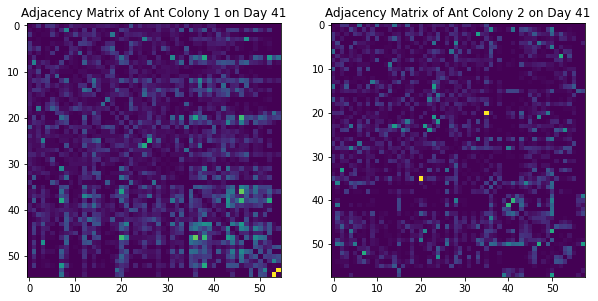

In [7]:
G1_adj_mat = nx.to_numpy_matrix(G1_41)
G2_adj_mat = nx.to_numpy_matrix(G2_41)

fig, axs = plt.subplots(1,2, figsize=(10,15))

axs[0].title.set_text("Adjacency Matrix of Ant Colony 1 on Day 41")
axs[0].imshow(G1_adj_mat)

axs[1].title.set_text("Adjacency Matrix of Ant Colony 2 on Day 41")
axs[1].imshow(G2_adj_mat)

plt.show()

<p><font size="+2">🐜</font>"If you be a nice kid, one day you can see the <s>smurfs</s> ants in adjacency matrix."  <font size="+2">🐜</font></p> 

### 1.3 Plot the node degree distributions of both graphs in an overlaid manner.

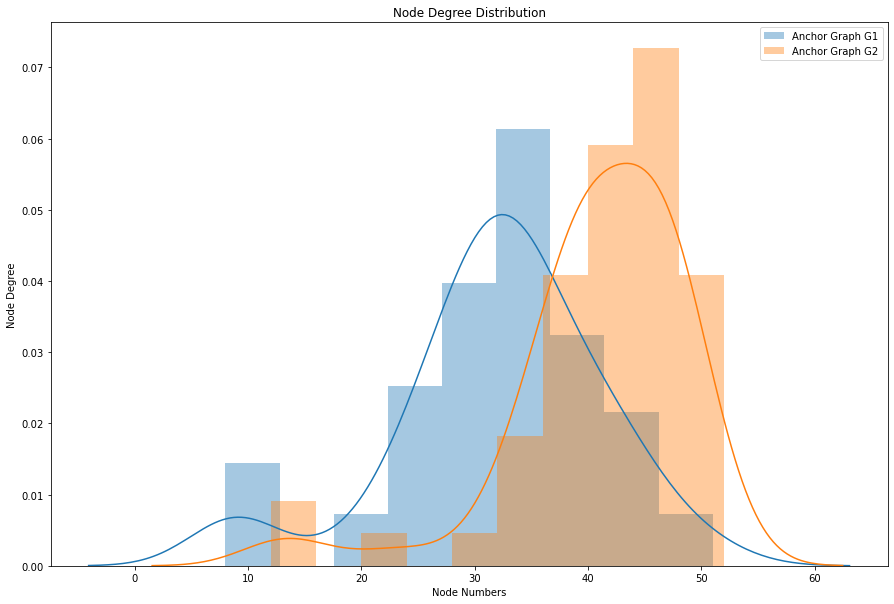

In [8]:
plt.figure(figsize=(15, 10))

G2_node_degree = np.array(list(dict(G1_41.degree).values()))
G1_node_degree = np.array(list(dict(G2_41.degree).values()))

sns.distplot(G1_node_degree, label='Anchor Graph G1')
sns.distplot(G2_node_degree, label='Anchor Graph G2')

plt.xlabel("Node Numbers")
plt.ylabel("Node Degree")
plt.title("Node Degree Distribution")
plt.legend()
plt.show()

# II- Communication Efficiency of Ant Colonies 
### 2.1 Concept and principles
The project concept is communication efficiency. It is known as network communication efficiency. It is measured information on how the information is changed between the nodes in the graph. The concept of efficiency is implemented with the global and the local efficiency principles in this project. We will be looking at efficiency of distant information transfer within real-world ant colony with global efficiency and we will be looking at average efficiency of information transfer within an ant colony locally with local efficiency.


### 2.2 Illustrate with small graphs


In this section, our objective is to calculate the global efficiency and show the working logic of it.

In [9]:
node_amount = 10
edge_prob = 0.5

Let's start with creating a new graph with the given node amount and edge probability using the erdos renyi random graph generation.

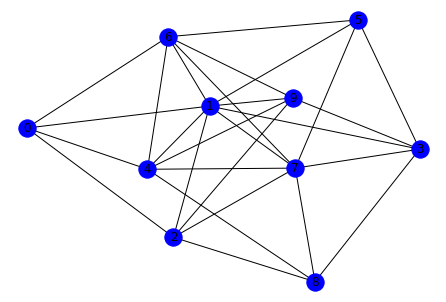

In [10]:
G = nx.erdos_renyi_graph(node_amount, edge_prob, directed=False)
nx.draw(G, with_labels = True, node_color='b')

After creating the graph, next step is to calculate all the shortest paths. In this example, we used dijkstra's shortest path algorithm but another algorithm can be used.

Networkx's all_pairs_dijkstra algorithm gives us the shortest path lengths and path indices for each shortest path. We only need shortest path lengths so we're getting those values into path_lengths variable.

In [11]:
shortest_paths = dict(nx.all_pairs_dijkstra(G))

path_lengths = np.zeros((node_amount, node_amount))
for i in range(len(G.nodes)):
    for j in range(len(G.nodes)):
        path_lengths[i][j] = shortest_paths[i][0][j]

We also added a visualization for the shortest path that the algorithm found.

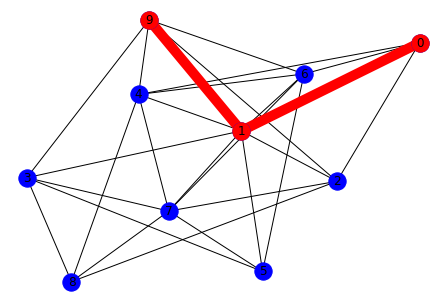

In [12]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='b', with_labels = True)
path = shortest_paths[0][1][node_amount-1]

nx.draw_networkx_nodes(G,pos, nodelist=path, node_color='r')
nx.draw_networkx_edges(G,pos, edgelist=list(zip(path,path[1:])), edge_color='r', width=10)

plt.show()

Path lenghts (l) found in the previous steps

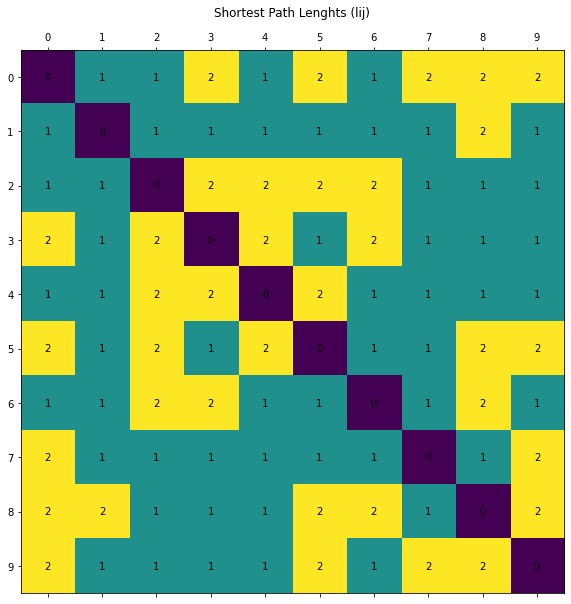

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.matshow(path_lengths)

for (i, j), z in np.ndenumerate(path_lengths):
    ax.text(j, i, int(z), ha='center', va='center')

plt.title('Shortest Path Lenghts (lij)')
plt.xticks(list(np.arange(0, node_amount)))
plt.yticks(list(np.arange(0, node_amount)))
plt.show()


As shown in the 2.3 section, we need to sum up all the inverse path lenghts and multiply them by the average.

In [14]:
inv_sum_path_lengts = 0
for lij in path_lengths.flatten():
    if lij==0:
        continue
    inv_sum_path_lengts += 1/lij

In [15]:
Eglob = 1/(node_amount*(node_amount-1))*inv_sum_path_lengts
print('Global Efficiency:', Eglob)

Global Efficiency: 0.8


We can check if our simulation is correct by using the global efficiency method that networkx offers.

In [16]:
Eglob_nx = nx.global_efficiency(G)
print('Networkx\'s implementation:', Eglob_nx)

Networkx's implementation: 0.8


Result of the both algorithms are matching. If we wanted to do the same simulation for local efficiency, we should have calculated the strength of each node instead of calculating their shortest path lenghts.

### 2.3 Describe the mathematical principles

#### Characteristic Path Length
The characteristic shortest pathlength is the average shortest pathlength between all possible pairs of nodes in garaph.

$$L= \frac{1}{L}\sum_{i}{l_{i}}=\frac{1}{N(N-1)}\sum_{i\neq j}{l_{ij}}$$

L: Path Lenght , $\ l_{i}$ : average shortest path from node i to all other nodes, N(N-1): number of  node pairs excluding self-pairing , ${l_{ij}}$ :shortest path length from node j to node i


Harmonic mean (Newman, 2003) estimatesthe averages shortest path length between all possible nodepairs in a fragmented graph.Harmonic mean is:
$$L'= {N(N-1)}\sum_{i\neq j} [\frac{1}{l_{ij}}]^{-1}$$

L' = Harmonic Mean , $ \frac{1}{l_{ij}} $: reciprocal shortest path from node j to i , N(N-1): number of  node pairs excluding self-pairing

The characteristic path length is a global measure of a graph's capacity to integrate information using shortest path routing using harmonic meat is desirable in fragmented graphs and is not unduly influenced by a small proportion of nose pairs.

 
#### Global Efficiency
 A graphs global efficiency , $E_{glob}$ , is the reciprocal of harmonic mean of its path lenghts.

$$E_{glob}= \frac{1}{L'}=\frac{1}{N(N-1)}\sum_{i\neq j}\frac{1}{l_{ij}}$$

$ E_{glob} $: global efficiency , L' = Harmonic Mean, $ \frac{1}{l_{ij}} $: reciprocal shortest path from node j to i , N(N-1): number of  node pairs excluding self-pairing

#### Local Efficiency
The local efficiency is the inverse of the average shortest path connecting all neighbors of that vertex.The formula is shown below that  It is defined for each node i in G.
 $$E_{local}{(i)}= \frac{1}{N_{G_{i}}(N_{G_{i}}-1)}\sum_{j,h\in G_{i}}\frac{1}{l_{jh}}$$ 
 
 $E_{local}{(i)}$ : local efficiency , ${N_{G_{i}}(N_{G_{i}}-1)}$: number of  node pairs excluding self-pairin that subgraph comprising all immediate neighbors of node i , $\frac{1}{l_{jh}}$ : shortest path length from node h to node j subgraph that comprising all immediate neighbors of node i

# III- R-Space


### 3.1.1. Dimension 1: Local Efficiency


The multiplicative inverse of the shortest path distance between nodes is the efficiency of a pair of nodes in a network. The average global efficiency of the subgraph caused by the node's neighbors is the local efficiency of the node in the graph. A network's "local efficiency" is defined as:

$$E_{local}{(i)}= \frac{1}{N_{G_{i}}(N_{G_{i}}-1)}\sum_{j,h\in G_{i}}\frac{1}{l_{jh}}$$ 

### 3.1.2. Dimension 2: Global Efficiency:
The reciprocal of the harmonic mean of a graph's path lengths is used to calculate its global efficiency:

$$E_{glob}= \frac{1}{L'}=\frac{1}{N(N-1)}\sum_{i\neq j}\frac{1}{l_{ij}}$$

### 3.1.3. Relation to Explore

Information flow efficiency from node i to j in a general or sub graph of a network is measured by global and local efficiency values. Non-clustered graphs have paths between vertices that are globally shorter but locally longer. As a result, we expect the global efficiencies of colonies to be unique to themselves. We also expect the local efficiencies to differ.

### 3.2 Simulate n1 = 100 random graphs derived from G1 with same node strength distribution

In [ ]:
G1_sim_graphs = []

for i in tqdm(range(rnd_graph_number_for_G1)):
  rnd_graph = nx.random_reference(G1)
  G1_sim_graphs.append(rnd_graph)

In [17]:
G1_list = np.load('G1.npy')
G1_41_sim_graphs = [nx.from_numpy_array(A) for A in G1_list]

### 3.3 Simulate n2 = 100 random graphs derived from G2 with same node strength distribution

In [ ]:
G2_sim_graphs = []

for i in range(rnd_graph_number_for_G2):
  rnd_graph = nx.random_reference(G2)
  G2_sim_graphs.append(rnd_graph)

In [18]:
G2_list = np.load('G2.npy')
G2_41_sim_graphs = [nx.from_numpy_array(A) for A in G2_list]

### 3.4 Node strength distribution

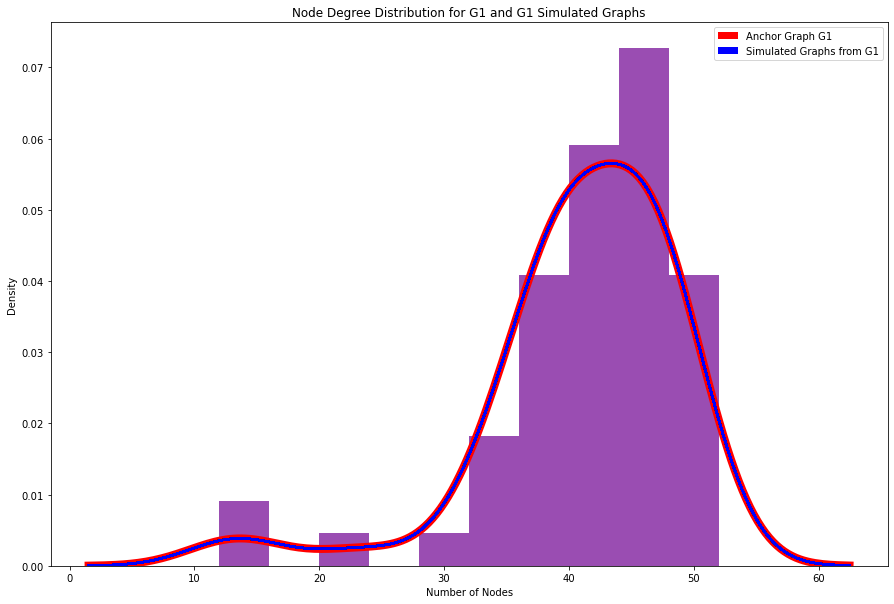

In [19]:
plt.figure(figsize=(15, 10))

G1_node_degree = np.array(list(dict(G1_41.degree).values()))
sns.distplot(G1_node_degree, bins=10, color='red', hist_kws=dict(alpha=0.3), kde_kws=dict(linewidth=8), label='Anchor Graph G1')

for i, G1_sim_node in enumerate(G1_41_sim_graphs):
    G1_sim_node_degree = np.array(list(dict(G1_sim_node.degree).values()))
    if i==0:
        sns.distplot(G1_sim_node_degree, bins=10, color='blue', hist_kws=dict(alpha=0.005), kde_kws=dict(linewidth=2), label='Simulated Graphs from G1')
    sns.distplot(G1_sim_node_degree, bins=10, color='blue', hist_kws=dict(alpha=0.005), kde_kws=dict(linewidth=2))

plt.xlabel("Number of Nodes")
plt.ylabel("Density")
plt.title("Node Degree Distribution for G1 and G1 Simulated Graphs")

leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.show()

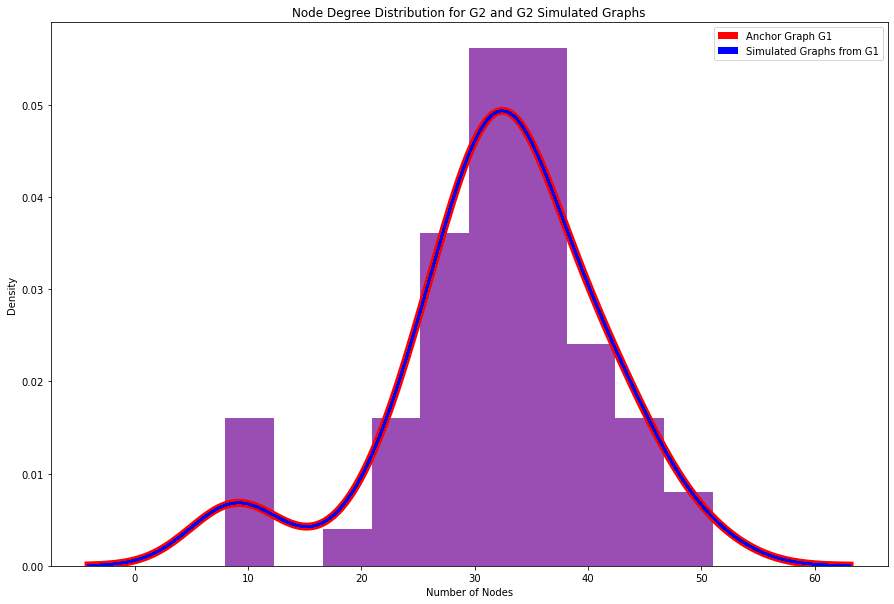

In [20]:
plt.figure(figsize=(15, 10))

G2_node_degree = np.array(list(dict(G2_41.degree).values()))
sns.distplot(G2_node_degree, bins=10, color='red', hist_kws=dict(alpha=0.3), kde_kws=dict(linewidth=8), label='Anchor Graph G1')

for i, G2_sim_node in enumerate(G2_41_sim_graphs):
    G2_sim_node_degree = np.array(list(dict(G2_sim_node.degree).values()))
    if i==0:
        sns.distplot(G2_sim_node_degree, bins=10, color='blue', hist_kws=dict(alpha=0.005), kde_kws=dict(linewidth=2), label='Simulated Graphs from G1')
    sns.distplot(G2_sim_node_degree, bins=10, color='blue', hist_kws=dict(alpha=0.005), kde_kws=dict(linewidth=2))

plt.xlabel("Number of Nodes")
plt.ylabel("Density")
plt.title("Node Degree Distribution for G2 and G2 Simulated Graphs")

leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.show()

### 3.5 Plot all the graphs

In [21]:
G1_41_anchor_local_efficiency = nx.local_efficiency(G1_41)
G1_41_anchor_global_efficiency = nx.global_efficiency(G1_41)

In [22]:
G1_41_local_efficiencies = []
G1_41_global_efficiencies = []

for G1_41_sim_graph in tqdm(G1_41_sim_graphs):
    G1_41_local_efficiencies.append(nx.local_efficiency(G1_41_sim_graph))
    G1_41_global_efficiencies.append(nx.global_efficiency(G1_41_sim_graph))    

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:02<00:00,  1.83s/it]


In [23]:
G2_41_anchor_local_efficiency = nx.local_efficiency(G2_41)
G2_41_anchor_global_efficiency = nx.global_efficiency(G2_41)

In [24]:
G2_41_local_efficiencies = []
G2_41_global_efficiencies = []

for G2_41_sim_graph in tqdm(G2_41_sim_graphs):
    G2_41_local_efficiencies.append(nx.local_efficiency(G2_41_sim_graph))
    G2_41_global_efficiencies.append(nx.global_efficiency(G2_41_sim_graph))    

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:22<00:00,  1.21it/s]


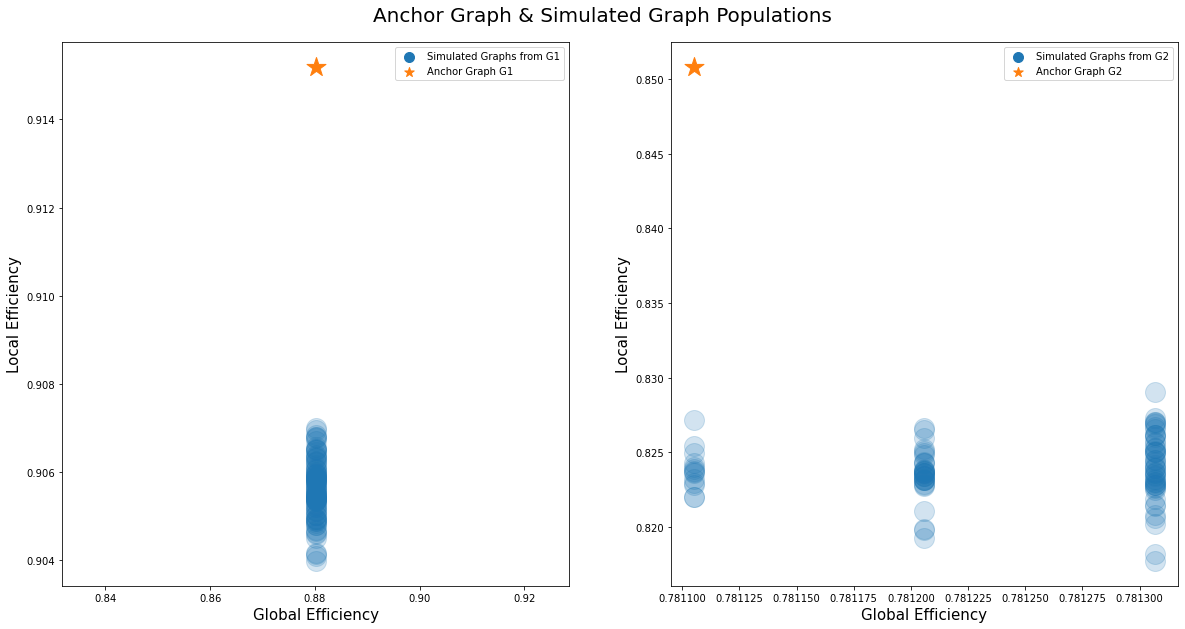

In [25]:
plt.figure(figsize=(20, 10))


plt.subplot(1, 2, 1)
plt.scatter(G1_41_global_efficiencies, G1_41_local_efficiencies, s=400, alpha=0.2, label='Simulated Graphs from G1')
plt.scatter(G1_41_anchor_global_efficiency, G1_41_anchor_local_efficiency, s=400, marker='*', label='Anchor Graph G1')
leg = plt.legend()
for lh in leg.legendHandles: 
    lh._sizes = [100] 
    lh.set_alpha(1)

plt.xlabel('Global Efficiency', fontsize=15)
plt.ylabel('Local Efficiency', fontsize=15)

plt.subplot(1, 2, 2)
plt.scatter(G2_41_global_efficiencies, G2_41_local_efficiencies, s=400, alpha=0.2, label='Simulated Graphs from G2')
plt.scatter(G2_41_anchor_global_efficiency, G2_41_anchor_local_efficiency, s=400, marker='*', label='Anchor Graph G2')

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._sizes = [100] 
    lh.set_alpha(1)

plt.xlabel('Global Efficiency', fontsize=15)
plt.ylabel('Local Efficiency', fontsize=15)

plt.suptitle('Anchor Graph & Simulated Graph Populations', y=0.93 , fontsize=20)
plt.show()


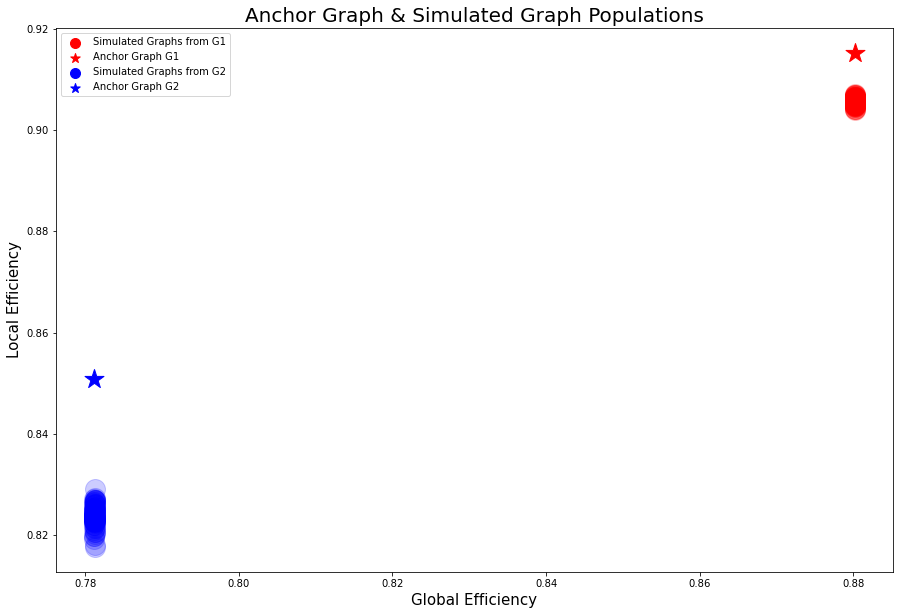

In [26]:
plt.figure(figsize=(15, 10))

plt.scatter(G1_41_global_efficiencies, G1_41_local_efficiencies, s=400, alpha=0.2, color='red', label='Simulated Graphs from G1')
plt.scatter(G1_41_anchor_global_efficiency, G1_41_anchor_local_efficiency, s=400, marker='*', color='red', label='Anchor Graph G1')
plt.scatter(G2_41_global_efficiencies, G2_41_local_efficiencies, s=400, alpha=0.2, color='blue', label='Simulated Graphs from G2')
plt.scatter(G2_41_anchor_global_efficiency, G2_41_anchor_local_efficiency, s=400, marker='*', color='blue', label='Anchor Graph G2')

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._sizes = [100] 
    lh.set_alpha(1)
    
plt.xlabel('Global Efficiency', fontsize=15)
plt.ylabel('Local Efficiency', fontsize=15)

plt.title('Anchor Graph & Simulated Graph Populations', fontsize=20)
plt.show()


# IV-Result interpretation and discussion

We can see that global efficiency of anchor colonies and simulated colonies are equal. We were not expecting that colonies global efficiency to be equal. We were expecting when a colony changes global efficiency of the colony should be changed also. This means that colonies communication efficiency does not change on the colony scale but if we look at the individual ants which means if we look at the local efficiency in the colonies we can see that communication efficiency differs.

---

# EXTRA PART

##  Comparison between colonies 

In this section, we will examine the behavior of the two selected ant colonies, Colony 1 and Colony 2, on the 1st, 10th, 25th and 41st days. We will make some inferences from 8 different data in total.

In [27]:
G1_1_anchor_local_efficiency = nx.local_efficiency(G1_1)
G1_1_anchor_global_efficiency = nx.global_efficiency(G1_1)
G1_10_anchor_local_efficiency = nx.local_efficiency(G1_10)
G1_10_anchor_global_efficiency = nx.global_efficiency(G1_10)
G1_25_anchor_local_efficiency = nx.local_efficiency(G1_25)
G1_25_anchor_global_efficiency = nx.global_efficiency(G1_25)

G2_1_anchor_local_efficiency = nx.local_efficiency(G2_1)
G2_1_anchor_global_efficiency = nx.global_efficiency(G2_1)
G2_10_anchor_local_efficiency = nx.local_efficiency(G2_10)
G2_10_anchor_global_efficiency = nx.global_efficiency(G2_10)
G2_25_anchor_local_efficiency = nx.local_efficiency(G2_25)
G2_25_anchor_global_efficiency = nx.global_efficiency(G2_25)

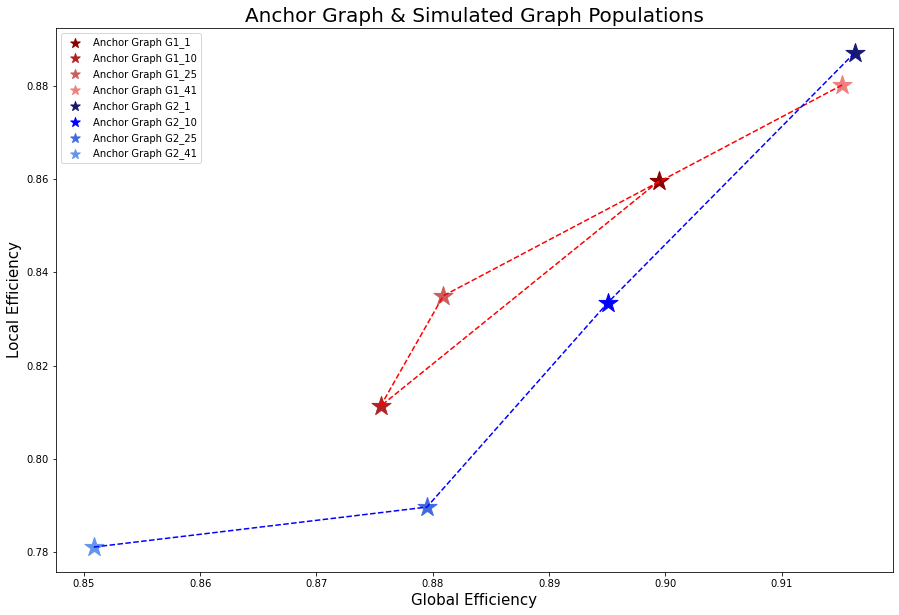

In [28]:
plt.figure(figsize=(15, 10))

G1_colors = ['darkred', 'firebrick', 'indianred', 'lightcoral']
G2_colors = ['midnightblue', 'blue',  'royalblue', 'cornflowerblue']

days = ['1', '10', '25', '41']

G1 = [[G1_1_anchor_local_efficiency, G1_1_anchor_global_efficiency],
      [G1_10_anchor_local_efficiency, G1_10_anchor_global_efficiency],
      [G1_25_anchor_local_efficiency, G1_25_anchor_global_efficiency],
      [G1_41_anchor_local_efficiency, G1_41_anchor_global_efficiency]]

G2 = [[G2_1_anchor_local_efficiency, G2_1_anchor_global_efficiency],
      [G2_10_anchor_local_efficiency, G2_10_anchor_global_efficiency],
      [G2_25_anchor_local_efficiency, G2_25_anchor_global_efficiency],
      [G2_41_anchor_local_efficiency, G2_41_anchor_global_efficiency]]

for i, (G1_local, G1_global) in enumerate(G1):
    plt.scatter(G1_local, G1_global, s=400, marker='*', color=G1_colors[i], label='Anchor Graph G1_'+days[i])
    
plt.plot(np.array(G1)[:, 0], np.array(G1)[:, 1], linestyle='--', color='red')
    
for i, (G2_local, G2_global) in enumerate(G2):
    plt.scatter(G2_local, G2_global, s=400, marker='*', color=G2_colors[i], label='Anchor Graph G2_'+days[i])
    
plt.plot(np.array(G2)[:, 0], np.array(G2)[:, 1], linestyle='--', color='b')

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._sizes = [100] 
    lh.set_alpha(1)
    
plt.xlabel('Global Efficiency', fontsize=15)
plt.ylabel('Local Efficiency', fontsize=15)

plt.title('Anchor Graph & Simulated Graph Populations', fontsize=20)
plt.show()


If we look at to G2 Colony and compare the days, we can say that colonies communication efficiency better in the first day and after days passes the communication efficiency decreases overall. The reason this is happening is while days passes some ants in the colony dies. The died ones actually the ones that most of the communication goes through. We can say ones that died are hub ants for communication. 

In the G1 Colony, we can observe in the first 10 days ants in the hubs are dying and this greatly affects communication efficiency but after that, ones that died actually the ones that communicating less which corresponds to increase in communication efficiency.

### REFERENCES
1. Ek et al., Global efficiency of graphs, AKCE International Journal of Graphs and Combinatorics 87(1), 2015.
2. Graph Theory Blink 5.5 -Graph efficiency measures (https://www.youtube.com/watch?v=P0PBsRASneU&t=1160s)
3. Mersch, D. P., Crespi, A., & Keller, L. (2013). Tracking individuals shows spatial fidelity is a key regulator of ant social organization. Science, 340(6136), 1090-1093.
4. Dataset: https://networkrepository.com/asn.php